# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [ ]:
### count plot of all the class labels. 

In [1]:
import nltk
nltk.download('maxent_ne_chunker')
  

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [36]:
import os
claslab=list()
files = os.listdir(r'C:\Users\smile\Desktop\ASSIGNMENTS\ABHISHEK SVM\drive-download-20210529T063331Z-001\documents')
for filename in files:
    index = filename.find('_') 
    claslab.append(filename[0:index])

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

In [37]:
len(claslab)

18828

In [38]:
import re

In [39]:
from nltk import ne_chunk
import nltk
def chunking(doc):                           # rule 11
    nes = list()
    #for line in doc.split('\n'):
    for sent in nltk.sent_tokenize(doc):
        #print(sent)
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label') and ( chunk.label() == 'PERSON' or chunk.label() == 'GPE'):
                nes.append(chunk.label()+ ',' +' '.join(c[0] for c in chunk))
    #print(nes)
    for ne in nes:
        if ne.split(',')[0] == 'PERSON':
            doc = re.sub(re.escape(ne.split(',')[1])," ",doc, flags=re.IGNORECASE)
        if ne.split(',')[0] == 'GPE':
            doc = re.sub(re.escape(ne.split(',')[1]),re.escape("_".join(ne.split(',')[1].split())), \
                         doc, flags=re.IGNORECASE)
    return doc

In [6]:
def removetext(file_content):
    
    l = re.findall('\S+@\S+',file_content)
    for i in l:
        file_content=file_content.replace(i,'')
    l1 = re.findall('Subject:.+',file_content)
    for i in l1:
        file_content=file_content.replace(i,'')
    l2 = re.findall('From:.+',file_content)
    for i in l2:
        file_content=file_content.replace(i,'')
    l3 = re.findall('Write to:.+',file_content)
    for i in l3:
        file_content=file_content.replace(i,'')
    l4 = re.findall('\<\s.*\s\>',file_content)
    for i in l4:
        file_content=file_content.replace(i,'')
    l5 = re.findall('\(\s.*\s\)',file_content)
    for i in l5:
        file_content=file_content.replace(i,'')
    l6 = re.findall('\\n',file_content)
    for i in l6:
        file_content=file_content.replace(i,' ')
    
    l7 = re.findall('\\t',file_content)
    for i in l7:
        file_content=file_content.replace(i,'')
    
    l8 = re.findall('\\\\',file_content)
    for i in l8:
        file_content=file_content.replace(i,'')
    
    l9 = re.findall('\-',file_content)
    for i in l9:
        file_content=file_content.replace(i,'')
    
    l10 = re.findall(r'\w+:\s?',file_content)
    for i in l10:
        file_content=file_content.replace(i,'')
    l11 = re.findall('\d',file_content)
    for i in l11:
        file_content=file_content.replace(i,'')  
    
    
    phrase = re.sub(r"won't", "will not", file_content)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    phrase=re.sub('\)','',phrase)
    phrase=re.sub('\.','',phrase)
    phrase=re.sub('\>','',phrase)
    phrase=re.sub('\<','',phrase)
    phrase=re.sub('\?','',phrase)
    phrase=re.sub('\\n','',phrase)
    phrase=re.sub('\,','',phrase)
    phrase=re.sub('\*','',phrase)
    phrase=re.sub('\!','',phrase)
    phrase=re.sub('\(','',phrase)
    phrase=re.sub('\=','',phrase)
    phrase=re.sub('\+','',phrase)
    phrase=re.sub('\-','',phrase)
    phrase=re.sub('\[',' ',phrase)
    phrase=re.sub('\]',' ',phrase)

    
    lst = re.findall('\w+\_\w+', phrase)
    for i in lst:
        x=re.split('\_',i)
        for j in x:
            if len(j)<=2:
                phrase=phrase.replace(j,'')
    
    lst1 = re.findall('\_', phrase)
    for i in lst1:
        phrase=phrase.replace(i,' ')
    
    phrase = chunking(phrase)
    
    for i in phrase.split(' '):
        if (len(i)<=2 and len(i)>0) or len(i)>15:
            phrase=phrase.replace(i,'')
        else:
            phrase=phrase.replace(i,i.lower())
        
    phrase = re.sub('[^A-Za-z0-9_]+', ' ', phrase)
    return phrase
        

In [7]:
def preprocess(Input_Text):
    """Do all the Preprocessing as shown above and
    return a tuple contain preprocess_email,preprocess_subject,preprocess_text for that Text_data"""
    lst = re.findall('\S+@\S+', Input_Text)
    #list_of_preproessed_emails = list()
    email_words=list()
    subject=[]
    for i in lst:
        index =  re.split('@', i)
        r=re.sub('>','',index[1])
        r1=re.sub('\)','',r)
        x=re.sub('\.',' ',r1)
        for j in x.split(' '):
            if len(j)>2:
                email_words.append(j)
    list_of_preproessed_emails=' '.join(email_words)
    for lst in re.findall("Subject:.+", file_content):
        #print(lst)
        x=re.split("\:",lst)
        x1=re.sub('\)','',x[-1])
        x2=re.sub('\.','',x1)
        x3=re.sub('\>','',x2)
        x4=re.sub('\<','',x3)
        x5=re.sub('\?','',x4)
        x6=re.sub('\\n','',x5)
        x7=re.sub('\,','',x6)
        x8=re.sub('\*','',x7)
        x9=re.sub('\!','',x8)
        x10=re.sub('\(','',x9)
        x11=re.sub('\=','',x10)
        x12=re.sub('\+','',x11)
        x13=re.sub('\-','',x12)
        x14=re.sub('\[',' ',x13)
        x15=re.sub('\]',' ',x14)
        subject.append(x15)
    list_of_preproessed_subjects=' '.join(subject)
    text = removetext(Input_Text)
    return (list_of_preproessed_emails,list_of_preproessed_subjects,text)
    #return (list_of_preproessed_emails,subject,text)

In [8]:
filename='C://Users//smile//Desktop//ASSIGNMENTS//ABHISHEK SVM//drive-download-20210529T063331Z-001\documents//alt.atheism_49960.txt'
file_object  = open(filename,'r')
file_content = file_object.read()


In [10]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [11]:
preprocess_email,preprocess_subject,preprocess_text = preprocess(file_content)

In [12]:
print('---preprocess_email---')
print(preprocess_email)
print('---preprocess_subject---')
print(preprocess_subject)
print('---preprocess_text---')
print(preprocess_text)

---preprocess_email---
mantis netcom com mantis
---preprocess_subject---
 Atheist Resources
---preprocess_text---
 reource cemr tt reource ddree tt gnizti u freedom from religi fouti fh bumper ticker ted otr tt prprnli re vilble from t freedom from religi fouti t evoluti ign evoluti ign ell t fh fh ymbol like t e tick tir cr but wh fe t wd wrten i t luxe mould pltic fh potpid t people t Sn Frncco By re cn g Fh from try milg f n people who directly t price per fh mericn tt pre p publh vriou tt book crique t bible lt Biblicl ctrdicti o e uch book t bible Hbook Bll foote mericn tt Pre bn edi bible ctrdicti burd troc imml ct Bll t bible Ctrdict elf p Bed t g veri t bible Cmer od ut POETHE book ell book cludg Holy Hr ee low lternte ddre which my newer olr Promu Book glenn rive Bufflo FImericnS f humnm gnizti promotg blck eculr humnm uncoverg t hry blck freeought ty publh qurterly newlter h exmer Bufflo uned gdom tilt Pre oci til Seculr octy Ilgt high tre Hollowy od d d Brh Humnt oci ou Plce

In [17]:
import re
import os
from tqdm import tqdm
path = 'C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\documents\\'
files = os.listdir(path)
list_of_emails = list()
list_of_subjects = list()
list_of_text = list()
for filename in tqdm(files):
    file_object  = open(path+filename,'r')
    file_content = file_object.read()
    file_object_write  = open(path+filename,'w')
    preprocess_email,preprocess_subject,preprocess_text = preprocess(file_content)
    #print(preprocess_text)
    list_of_emails.append(preprocess_email)
    list_of_subjects.append(preprocess_subject)
    list_of_text.append(preprocess_text)
    file_object_write.write(preprocess_text)
    file_object_write.close()

100%|██████████| 18828/18828 [30:19<00:00, 10.35it/s]  


In [18]:
import pandas as pd
x = pd.DataFrame(list(zip(list_of_emails, list_of_subjects,list_of_text)), 
               columns =['preprocessed_email', 'preprocessed_subject','preprocessed_text'])
x['preprocessed_col']= x["preprocessed_email"].astype(str) +" "+ x["preprocessed_subject"].astype(str) +" "+ x["preprocessed_text"].astype(str)
x.drop(['preprocessed_email', 'preprocessed_subject','preprocessed_text'], axis=1,inplace=True)
x.head()

,preprocessed_col
0,mantis netcom com mantis Atheist Resources r...
1,mantis mantis mantis Introduction to Atheism ...
2,dbstu1 tu-bs mimsy umd edu umd edu Gospel Dat...
3,mantis kepler unh edu university violating se...
4,"Watson Ibm Com harder ccr-p ida org, harder cc..."


In [40]:
y = pd.DataFrame(list(claslab), 
               columns =['claslab']) 
y.head()

,claslab
0,alt.atheism
1,alt.atheism
2,alt.atheism
3,alt.atheism
4,alt.atheism


In [41]:
y['claslab'].unique().shape

(20,)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y,random_state=10)
print(X_train.shape,y_train.shape)

(14121, 1) (14121, 1)


In [43]:
print(X_test.shape,y_test.shape)

(4707, 1) (4707, 1)


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
t=  Tokenizer(
    filters='',
    lower=False,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0,
)
t.fit_on_texts(X_train['preprocessed_col'].tolist())

In [45]:
max_length = 300

sequences = t.texts_to_sequences(list(X_train['preprocessed_col'].values))
pre_pad_train = pad_sequences(sequences,maxlen=max_length, padding='pre')

sequences = t.texts_to_sequences(list(X_test['preprocessed_col'].values))
pre_pad_test = pad_sequences(sequences,maxlen=max_length, padding='pre')
print(pre_pad_train.shape,pre_pad_test.shape)

(14121, 300) (4707, 300)


In [46]:
vocab= len(t.word_index)+1
print(vocab)

159940


In [51]:
import numpy as np
import pickle
from tqdm import tqdm
f = open('C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\glove_vectors', 'rb')      
picklef = pickle.load(f)
embeddings_index = dict()
for line in tqdm(picklef):
    values = line.split()
    word = values[0]
    coefs = picklef[word][:300]
    embeddings_index[word] = coefs
f.close()

100%|██████████| 51510/51510 [00:00<00:00, 748539.11it/s]


In [53]:
# create a weight matrix for words in training docs
import numpy as np
embedding_matrix = np.zeros((vocab, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [54]:
y_train['claslab'].unique().shape

(20,)

In [59]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
train_seq= le.fit_transform(y_train['claslab'])
test_seq= le.fit_transform(y_test['claslab'])

In [60]:
y_train['claslab'].unique()

array(['sci.electronics', 'soc.religion.christian', 'rec.motorcycles',
       'talk.politics.misc', 'sci.crypt', 'rec.autos',
       'talk.politics.guns', 'rec.sport.hockey', 'misc.forsale',
       'comp.os.ms-windows.misc', 'comp.graphics', 'sci.space',
       'comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'comp.windows.x',
       'talk.politics.mideast', 'sci.med', 'alt.atheism',
       'talk.religion.misc', 'comp.sys.mac.hardware'], dtype=object)

In [61]:
train_seq.shape

(14121,)

In [62]:
train_lab = tf.keras.utils.to_categorical(
    train_seq, num_classes=20, dtype='float32'
)
test_lab = tf.keras.utils.to_categorical(
    test_seq, num_classes=20, dtype='float32'
)

In [63]:
train_lab.shape,test_lab.shape

((14121, 20), (4707, 20))

In [93]:
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D,Concatenate
from tensorflow.keras.layers import Dropout,MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import initializers

In [81]:
tf.keras.backend.clear_session()
inputs =tf.keras.Input(shape=(300,))
x=Embedding(vocab, 300, weights=[embedding_matrix],input_length=max_length,trainable=False)(inputs)
initializer = tf.keras.initializers.RandomNormal(
    mean=0.0, stddev=0.05, seed=None
)
x1=Conv1D(8,2,activation='relu',kernel_initializer=initializer)(x)
x2=Conv1D(9,2,activation='relu',kernel_initializer=initializer)(x)
x3=Conv1D(10,2,activation='relu',kernel_initializer=initializer)(x)

result=Concatenate()([x1,  x2, x3])
maxpool=MaxPooling1D(pool_size=2, strides=1, padding='same')(result)

x4=Conv1D(11,2,activation='relu',kernel_initializer=initializer)(maxpool)
x5=Conv1D(12,2,activation='relu',kernel_initializer=initializer)(maxpool)
x6=Conv1D(13,2,activation='relu',kernel_initializer=initializer)(maxpool)

result1=Concatenate()([x4,  x5, x6])
maxpool1=MaxPooling1D(pool_size=2, strides=1, padding='same')(result1)

x7=Conv1D(16,2,activation='relu',kernel_initializer=initializer)(maxpool1)
x8=Flatten()(x7)
x9=Dropout(0.2)(x8)

x10=Dense(32, activation='relu',kernel_initializer=initializer) (x9)
output=Dense(20, activation='softmax',kernel_initializer=initializer)(x10)
model = Model(inputs=inputs, outputs=output)
model.summary()

img_file = 'C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\model_1.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
path = 'C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\'
checkpoint = ModelCheckpoint(os.path.join(path, 'model_1.hdf5'), monitor = 'val_acc',save_best_only=True)

log_dir="C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\logs_model_1\\log_model_1" + 'log'#datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     47982000    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 299, 8)       4808        embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 299, 9)       5409        embedding[0][0]                  
______________________________________________________________________________________________

In [71]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_m])


model.fit(pre_pad_train,train_lab,epochs=20, validation_data=(pre_pad_test,test_lab),callbacks=[tensorboard_callback,earlystop,checkpoint])
print("Saved model to disk")

Epoch 1/20
442/442 [==============================] - 31s 67ms/step - loss: 2.7067 - accuracy: 0.1058 - f1_m: 2.7424e-04 - val_loss: 2.5011 - val_accuracy: 0.1470 - val_f1_m: 0.0037
Epoch 2/20
442/442 [==============================] - 26s 60ms/step - loss: 2.3746 - accuracy: 0.1816 - f1_m: 0.0166 - val_loss: 2.2767 - val_accuracy: 0.2122 - val_f1_m: 0.0807
Epoch 3/20
442/442 [==============================] - 28s 64ms/step - loss: 1.9773 - accuracy: 0.3141 - f1_m: 0.1458 - val_loss: 1.9541 - val_accuracy: 0.3233 - val_f1_m: 0.1919
Epoch 4/20
442/442 [==============================] - 27s 61ms/step - loss: 1.6714 - accuracy: 0.4262 - f1_m: 0.2991 - val_loss: 1.8310 - val_accuracy: 0.3718 - val_f1_m: 0.2703
Epoch 5/20
442/442 [==============================] - 28s 63ms/step - loss: 1.4918 - accuracy: 0.4846 - f1_m: 0.3905 - val_loss: 1.7128 - val_accuracy: 0.4190 - val_f1_m: 0.3383
Epoch 6/20
442/442 [==============================] - 28s 64ms/step - loss: 1.3432 - accuracy: 0.5375 - f1

In [72]:
from tensorflow.keras.backend import clear_session
# Before instantiating a tf.data.Dataset obj & before model creation, call:
clear_session()

In [73]:
%load_ext tensorboard
%tensorboard --logdir="C:\Users\smile\Desktop\ASSIGNMENTS\ABHISHEK SVM\drive-download-20210529T063331Z-001\logs_model_1\log_model_1log"


## epoch_accuracy
1.For train data, epoch accuracy increses from 0.0312 at epoch 1 to 0.6994 at epoch 10.

2.For validation data,epoch accuracy increses from 0.1334 at epoch 1 to 0.3314 at epoch 10.

## epoch_f1_m
1.For train data, epoch f1 score increses from 0.0011 at epoch 1 to 0.7618 at epoch 10.

2.For validation data,epoch f1 score increses from 0.0012 at epoch 1 to 0.3538at epoch 10.

## epoch_loss
1.For train data, epoch loss is decreses from 2.9972 at epoch 1 to 0.9287 at epoch 10.

2.For validation data,epoch loss is varing from 2.6061 to 3.3506 .

# Histogram
1.The weights of each conv and dense layer are not normaly distributed and almost zero centered

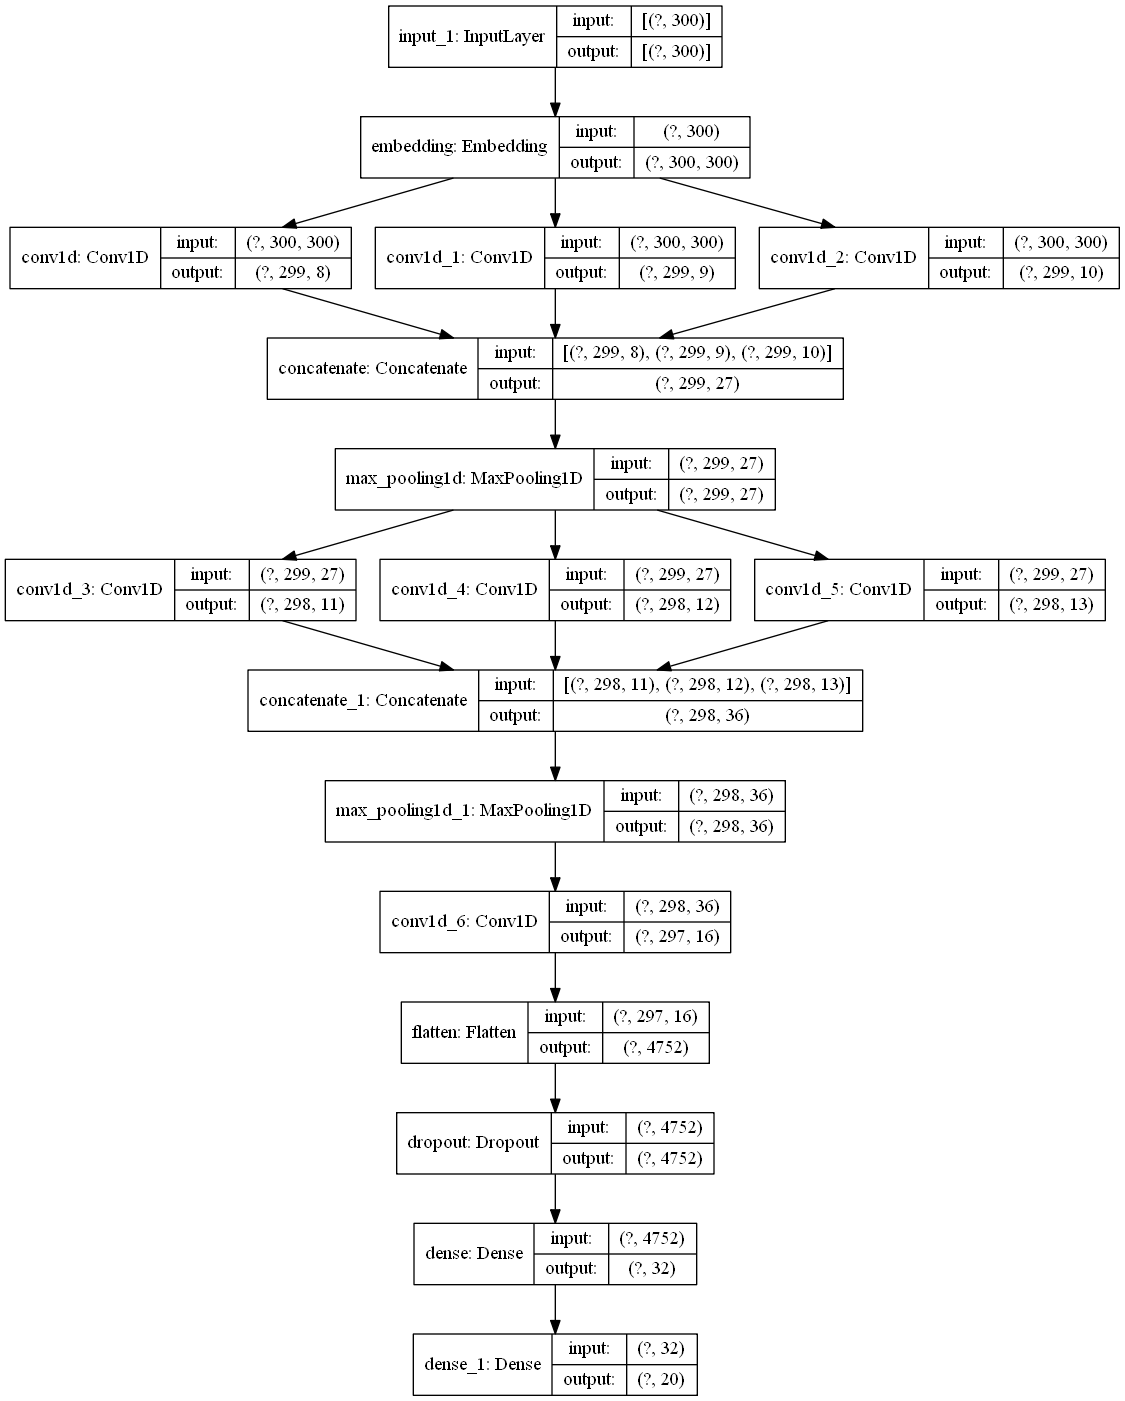

In [85]:
from IPython.display import Image
Image('C://Users//smile//Desktop//ASSIGNMENTS//ABHISHEK SVM//drive-download-20210529T063331Z-001//model_1.png')

In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
t=  Tokenizer(
    num_words=300,
    filters='',
    lower=False,
    split=" ",
    char_level=True,
    oov_token=None,
    document_count=0,
)
t.fit_on_texts(X_train['preprocessed_col'].tolist())

In [88]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

101


In [89]:
max_length = 300

sequences = t.texts_to_sequences(list(X_train['preprocessed_col'].values))
pre_pad_train_char = pad_sequences(sequences,maxlen=max_length, padding='pre')

sequences = t.texts_to_sequences(list(X_test['preprocessed_col'].values))
pre_pad_test_char = pad_sequences(sequences,maxlen=max_length, padding='pre')
print(len(sequences))
print(pre_pad_train_char.shape,pre_pad_test_char.shape)

4707
(14121, 300) (4707, 300)


In [90]:
# create a weight matrix for words in training docs
import numpy as np
embedding_matrix_char = np.zeros((vocab_size_char, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_char[i] = embedding_vector

In [91]:
embedding_matrix_char.shape

(101, 300)

## MODEL_2

In [94]:
inputs =tf.keras.Input(shape=(300,))
x=Embedding(vocab_size_char, 300, weights=[embedding_matrix_char],input_length=max_length,trainable=False)(inputs)
x1=Conv1D(128,2,activation='relu')(x)
x2=Conv1D(64,2,activation='relu')(x1)
maxpool=MaxPooling1D(pool_size=2, strides=1, padding='same')(x2)

x4=Conv1D(32,2,activation='relu')(maxpool)
x5=Conv1D(16,2,activation='relu')(x4)
maxpool1=MaxPooling1D(pool_size=2, strides=1, padding='same')(x5)

x8=Flatten()(maxpool1)
x9=Dropout(0.2)(x8)
x10=Dense(64, activation='relu') (x9)
x11=Dense(32, activation='relu') (x10)
output=Dense(20, activation='softmax')(x11)
model = Model(inputs=inputs, outputs=output)
model.summary()

img_file = 'C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\model_2.png'
plot_model(model, to_file=img_file, show_shapes=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
path = 'C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\'
checkpoint = ModelCheckpoint(os.path.join(path, 'model_2.hdf5'), monitor = 'val_acc',save_best_only=True)

log_dir="C:\\Users\\smile\\Desktop\\ASSIGNMENTS\\ABHISHEK SVM\\drive-download-20210529T063331Z-001\\logs_Model2\\" + 'log'#datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 300, 300)          30300     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 299, 128)          76928     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 298, 64)           16448     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 298, 64)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 297, 32)           4128      
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 296, 16)           1040

In [96]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_m])


model.fit(pre_pad_train_char,train_lab,epochs=20, validation_data=(pre_pad_test_char,test_lab),callbacks=[tensorboard_callback,earlystop,checkpoint])
print("Saved model to disk")

Epoch 1/20
442/442 [==============================] - 38s 82ms/step - loss: 2.9936 - accuracy: 0.0522 - f1_m: 0.0000e+00 - val_loss: 2.9868 - val_accuracy: 0.0654 - val_f1_m: 0.0000e+00
Epoch 2/20
442/442 [==============================] - 33s 75ms/step - loss: 2.9742 - accuracy: 0.0681 - f1_m: 0.0000e+00 - val_loss: 2.9577 - val_accuracy: 0.0780 - val_f1_m: 0.0000e+00
Epoch 3/20
442/442 [==============================] - 36s 81ms/step - loss: 2.9514 - accuracy: 0.0755 - f1_m: 0.0000e+00 - val_loss: 2.9371 - val_accuracy: 0.0724 - val_f1_m: 0.0000e+00
Epoch 4/20
442/442 [==============================] - 34s 78ms/step - loss: 2.8982 - accuracy: 0.0913 - f1_m: 6.8559e-04 - val_loss: 2.8912 - val_accuracy: 0.0909 - val_f1_m: 0.0000e+00
Epoch 5/20
442/442 [==============================] - 32s 72ms/step - loss: 2.7862 - accuracy: 0.1243 - f1_m: 0.0087 - val_loss: 2.8636 - val_accuracy: 0.1037 - val_f1_m: 0.0033
Epoch 6/20
442/442 [==============================] - 33s 75ms/step - loss: 2.

In [97]:
%load_ext tensorboard
%tensorboard --logdir="C:\Users\smile\Desktop\ASSIGNMENTS\ABHISHEK SVM\drive-download-20210529T063331Z-001\logs_Model2\log"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## epoch_accuracy
1.For train data, epoch accuracy increses from 0.0607 at epoch 1 to 0.2268 at epoch 10.

2.For validation data,epoch accuracy is around 0.08.

## epoch_f1_m
1.For train data, epoch f1 score varies from 0 at epoch 1 to 0.1715 at epoch 10.

2.For validation data,epoch f1 score decreses from 0 at epoch 1 to 0.0228 at epoch 10.

## epoch_loss
1.For train data, epoch loss is decreses from 2.9869 at epoch 1 to 2.4836 at epoch 10.

2.For validation data,epoch loss is varing from 2.9752 to 3.27 .

# Histogram
1.The weights of each conv and dense layer are not normaly distributed and almost zero centered.

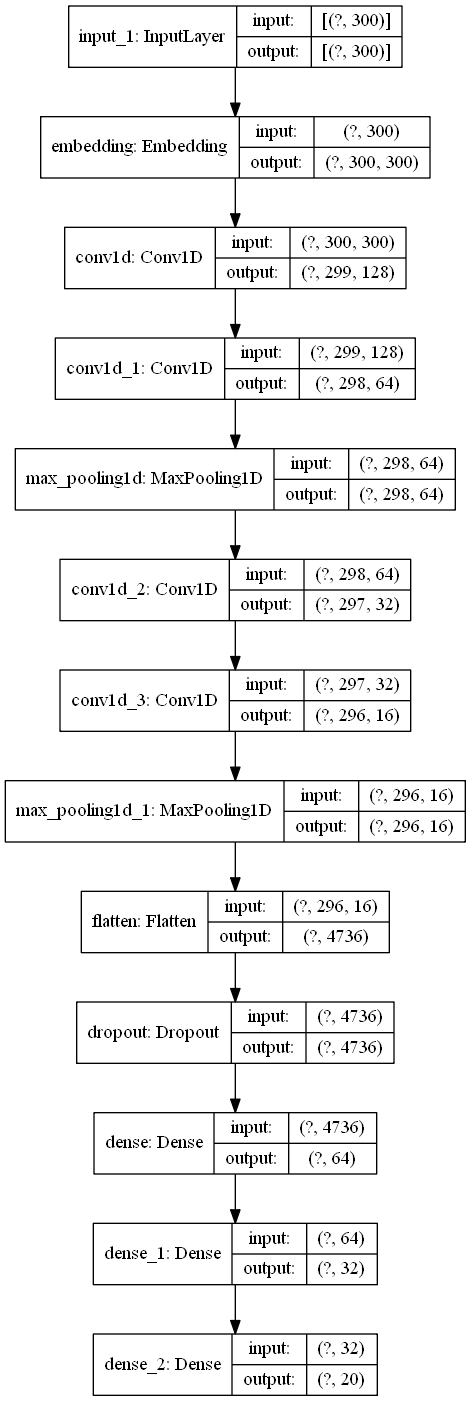

In [99]:
from IPython.display import Image
Image('C://Users//smile//Desktop//ASSIGNMENTS//ABHISHEK SVM//drive-download-20210529T063331Z-001//model_2.png')